In [1]:
#libraries and dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_scatter_density
from sklearn.cluster import KMeans

import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

champs2 = pd.read_csv("../Datasets/2/champs.csv")
participants=pd.read_csv("../Datasets/2/participants.csv")

champs5= pd.read_csv("../Datasets/5/LoL-Champions.csv")
teambans=pd.read_csv("../Datasets/2/teambans.csv")
stats=pd.read_csv("../Datasets/2/stats1.csv")

dotaheronames=pd.read_csv("../Datasets/3/hero_names.csv")
dotaplayers=pd.read_csv("../Datasets/3/players.csv")
dotaheroesdata=pd.read_csv("../Datasets/6/heroes_data.csv")

plt.rcParams['figure.figsize'] = [7, 7]

In [2]:
# LOL ŞAMPİYONLAR
print(champs2.id.count(), "\nhero in champs2 ds")
champs2.head()

138 
hero in champs2 ds


,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [3]:
# DOTA ŞAMPİYONLAR
print(dotaheronames["localized_name"], "\ndota heros in dotaheronames ds")

0           Anti-Mage
1                 Axe
2                Bane
3         Bloodseeker
4      Crystal Maiden
            ...      
107       Terrorblade
108           Phoenix
109            Oracle
110     Winter Wyvern
111        Arc Warden
Name: localized_name, Length: 112, dtype: object 
dota heros in dotaheronames ds


In [4]:
stats.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [5]:
participants.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [6]:
# LOL - CHAMPS2DEKİ BOŞ SATIRLAR KONTROLÜ
champs2.isnull().sum()

name    0
id      0
dtype: int64

In [7]:
# DOTA - dotaheronamesdeki BOŞ SATIRLAR KONTROLÜ
dotaheronames.isnull().sum()

name              0
hero_id           0
localized_name    0
dtype: int64

In [8]:
# LOL - CHAMPS5DEN GELEN ŞAMPİYONLAR
print(champs5)
champs5=champs5.loc[:,"Id":"Class"]
champs5.head()

      Id     Name    Class  Style  Difficulty DamageType  Damage  Sturdiness  \
0      1   Aatrox  Warrior      3           2          P       3           3   
1      2     Ahri     Mage     10           2          M       3           1   
2      3    Akali  Assasin      7           2         PM       3           1   
3      4  Alistar  Support      7           1          M       1           3   
4      5    Amumu     Tank      9           1          M       2           3   
..   ...      ...      ...    ...         ...        ...     ...         ...   
140  141      Zed  Assasin      6           3          P       3           1   
141  142    Ziggs     Mage      9           2          M       3           1   
142  143   Zilean  Support     10           2          M       2           1   
143  144      Zoe     Mage     10           3          M       3           1   
144  145     Zyra  Support     10           2          M       3           1   

     Crowd-Control  Mobility  Functiona

,Id,Name,Class
0,1,Aatrox,Warrior
1,2,Ahri,Mage
2,3,Akali,Assasin
3,4,Alistar,Support
4,5,Amumu,Tank


In [9]:
# DOTA - dotaheroesdatadan GELEN ŞAMPİYONLAR
print(dotaheroesdata)
dotaheroesdata=dotaheroesdata.loc[:,"id":"roles"]
dotaheroesdata.head()

     Unnamed: 0   id                          name  localized_name  \
0             0    1        npc_dota_hero_antimage       Anti-Mage   
1             1    2             npc_dota_hero_axe             Axe   
2             2    3            npc_dota_hero_bane            Bane   
3             3    4     npc_dota_hero_bloodseeker     Bloodseeker   
4             4    5  npc_dota_hero_crystal_maiden  Crystal Maiden   
..          ...  ...                           ...             ...   
115         115  121      npc_dota_hero_grimstroke      Grimstroke   
116         116  123        npc_dota_hero_hoodwink        Hoodwink   
117         117  126     npc_dota_hero_void_spirit     Void Spirit   
118         118  128        npc_dota_hero_snapfire        Snapfire   
119         119  129            npc_dota_hero_mars            Mars   

    primary_attr attack_type  \
0            agi       Melee   
1            str       Melee   
2            int      Ranged   
3            agi       Melee   

,id,name,localized_name,primary_attr,attack_type,roles
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"['Carry', 'Escape', 'Nuker']"
1,2,npc_dota_hero_axe,Axe,str,Melee,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,3,npc_dota_hero_bane,Bane,int,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [10]:
# LOL - CHAMPS5DEKİ BOŞ SATIRLAR KONTROLÜ
champs5.isnull().sum()

Id       0
Name     0
Class    0
dtype: int64

In [11]:
# DOTA - dotaheroesdatadaki BOŞ SATIRLAR KONTROLÜ
dotaheroesdata.isnull().sum()

id                0
name              0
localized_name    0
primary_attr      0
attack_type       0
roles             0
dtype: int64

In [12]:
# LOL - İSİMLER İLE CHAMPS2 VE CHAMPS5İ BİRLEŞTİRME
print("merged ds full join")
champs = pd.merge(champs2,champs5,how="outer",left_on="name",right_on="Name").drop("Id", axis=1)

print(champs[champs["name"].isnull()])
print("-----------------------------------------")
print(champs[champs["Name"].isnull()])

print("\n\n-----------left join-------------------\n\n")

print("merged ds left join")
champs = pd.merge(champs2,champs5,how="left",left_on="name",right_on="Name").drop("Id", axis=1)
print(champs[champs["name"].isnull()])
print("-----------------------------------------")
print(champs[champs["Name"].isnull()])
print(champs.count())
champs.head()

merged ds full join
    name  id    Name     Class
138  NaN NaN  Kai Sa  Marksman
139  NaN NaN   Neeko      Mage
140  NaN NaN    Pyke   Support
141  NaN NaN  Qiyana   Warrior
142  NaN NaN   Sylas   Warrior
143  NaN NaN   Yuumi   Support
144  NaN NaN     Zoe      Mage
-----------------------------------------
Empty DataFrame
Columns: [name, id, Name, Class]
Index: []


-----------left join-------------------


merged ds left join
Empty DataFrame
Columns: [name, id, Name, Class]
Index: []
-----------------------------------------
Empty DataFrame
Columns: [name, id, Name, Class]
Index: []
name     138
id       138
Name     138
Class    138
dtype: int64


,name,id,Name,Class
0,Jax,24,Jax,Warrior
1,Sona,37,Sona,Support
2,Tristana,18,Tristana,Marksman
3,Varus,110,Varus,Marksman
4,Fiora,114,Fiora,Warrior


In [13]:
# DOTA - KÜÇÜK TABLOYA BÜYÜKTEN CLASSLARI EKLEMECE
newdotachamps = pd.merge(dotaheroesdata,dotaheronames,how="right",left_on="localized_name",right_on="localized_name")
newdotachamps=newdotachamps.loc[:,["id","localized_name","roles"]]
print(newdotachamps)

      id  localized_name                                              roles
0      1       Anti-Mage                       ['Carry', 'Escape', 'Nuker']
1      2             Axe    ['Initiator', 'Durable', 'Disabler', 'Jungler']
2      3            Bane        ['Support', 'Disabler', 'Nuker', 'Durable']
3      4     Bloodseeker  ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...
4      5  Crystal Maiden        ['Support', 'Disabler', 'Nuker', 'Jungler']
..   ...             ...                                                ...
107  109     Terrorblade                       ['Carry', 'Pusher', 'Nuker']
108  110         Phoenix  ['Support', 'Nuker', 'Initiator', 'Escape', 'D...
109  111          Oracle         ['Support', 'Nuker', 'Disabler', 'Escape']
110  112   Winter Wyvern                   ['Support', 'Disabler', 'Nuker']
111  113      Arc Warden                       ['Carry', 'Escape', 'Nuker']

[112 rows x 3 columns]


In [14]:
# LOL - KARAKTERLERİN OYUN TİPLERİ CHAMPS'E SÜTUN OLARAK EKLENDİ
GameStyle = []
for iter in champs["Class"]:

    if (iter == "Mage" or iter == "Marksman" or iter == "Assasin" or iter == "Warrior"):
        GameStyle.append("Aggressive")
    else:
        GameStyle.append("Supportive")
champs["GameStyle"]=GameStyle
print(champs)

          name   id       Name     Class   GameStyle
0          Jax   24        Jax   Warrior  Aggressive
1         Sona   37       Sona   Support  Supportive
2     Tristana   18   Tristana  Marksman  Aggressive
3        Varus  110      Varus  Marksman  Aggressive
4        Fiora  114      Fiora   Warrior  Aggressive
..         ...  ...        ...       ...         ...
133       Shen   98       Shen      Tank  Supportive
134  Jarvan IV   59  Jarvan IV   Warrior  Aggressive
135   Malzahar   90   Malzahar      Mage  Aggressive
136        Zac  154        Zac   Warrior  Aggressive
137     Gragas   79     Gragas   Warrior  Aggressive

[138 rows x 5 columns]


In [15]:
# DOTA - KARAKTERLERİN OYUN TİPLERİ CHAMPS'E SÜTUN OLARAK EKLENDİ
GameStyle2 = []
for iter in newdotachamps["roles"]:
    iter = iter.split("'")
    iter = iter[1]
    if (iter=="Carry" or iter=="Nuker" or iter=="Escape" or iter=="Pusher"):
        GameStyle2.append("Aggressive")
    else:
        GameStyle2.append("Supportive")
newdotachamps["GameStyle"]=GameStyle2
print(newdotachamps)

      id  localized_name                                              roles  \
0      1       Anti-Mage                       ['Carry', 'Escape', 'Nuker']   
1      2             Axe    ['Initiator', 'Durable', 'Disabler', 'Jungler']   
2      3            Bane        ['Support', 'Disabler', 'Nuker', 'Durable']   
3      4     Bloodseeker  ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...   
4      5  Crystal Maiden        ['Support', 'Disabler', 'Nuker', 'Jungler']   
..   ...             ...                                                ...   
107  109     Terrorblade                       ['Carry', 'Pusher', 'Nuker']   
108  110         Phoenix  ['Support', 'Nuker', 'Initiator', 'Escape', 'D...   
109  111          Oracle         ['Support', 'Nuker', 'Disabler', 'Escape']   
110  112   Winter Wyvern                   ['Support', 'Disabler', 'Nuker']   
111  113      Arc Warden                       ['Carry', 'Escape', 'Nuker']   

      GameStyle  
0    Aggressive  
1    Supportive

In [16]:
# LOL - MAÇLARDAKİ ŞAMPİYON IDYE GÖRE ŞAMPİYON ÖZELLİKLERİNİ LİSTELEME
participants= pd.merge(participants,champs,how="left",left_on="championid",right_on="id")

print(participants.isnull().count())
participants.head(10)

id_x          1834520
matchid       1834520
player        1834520
championid    1834520
ss1           1834520
ss2           1834520
role          1834520
position      1834520
name          1834520
id_y          1834520
Name          1834520
Class         1834520
GameStyle     1834520
dtype: int64


,id_x,matchid,player,championid,ss1,ss2,role,position,name,id_y,Name,Class,GameStyle
0,9,10,1,19,4,11,NONE,JUNGLE,Warwick,19,Warwick,Warrior,Aggressive
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,Nami,267,Nami,Support,Supportive
2,11,10,3,119,7,4,DUO_CARRY,BOT,Draven,119,Draven,Marksman,Aggressive
3,12,10,4,114,12,4,SOLO,TOP,Fiora,114,Fiora,Warrior,Aggressive
4,13,10,5,112,4,3,SOLO,MID,Viktor,112,Viktor,Mage,Aggressive
5,14,10,6,72,11,4,NONE,JUNGLE,Skarner,72,Skarner,Warrior,Aggressive
6,15,10,7,3,4,12,SOLO,TOP,Galio,3,Galio,Mage,Aggressive
7,16,10,8,103,14,4,SOLO,MID,Ahri,103,Ahri,Mage,Aggressive
8,17,10,9,222,7,4,DUO_CARRY,BOT,Jinx,222,Jinx,Marksman,Aggressive
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,161,VelKoz,Mage,Aggressive


In [17]:
# DOTA - MAÇLARDAKİ ŞAMPİYON IDYE GÖRE ŞAMPİYON ÖZELLİKLERİNİ LİSTELEME
dotaplayers= pd.merge(dotaplayers,newdotachamps,how="left",left_on="hero_id",right_on="id")

print(dotaplayers.isnull().count())
dotaplayers.head(10)

match_id               500000
account_id             500000
hero_id                500000
player_slot            500000
gold                   500000
                        ...  
unit_order_continue    500000
id                     500000
localized_name         500000
roles                  500000
GameStyle              500000
Length: 77, dtype: int64


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue,id,localized_name,roles,GameStyle
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,NaN,NaN,NaN,86.0,Rubick,"['Support', 'Disabler', 'Nuker']",Supportive
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,Clockwerk,"['Initiator', 'Disabler', 'Durable', 'Nuker']",Supportive
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,83.0,Treant Protector,"['Support', 'Initiator', 'Durable', 'Disabler'...",Supportive
3,0,2,11,3,1179,22505,599,605,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Shadow Fiend,"['Carry', 'Nuker']",Aggressive
4,0,3,67,4,3307,23825,613,762,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,67.0,Spectre,"['Carry', 'Durable', 'Escape']",Aggressive
5,0,4,106,128,476,12285,397,524,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,106.0,Ember Spirit,"['Carry', 'Escape', 'Nuker', 'Disabler', 'Init...",Aggressive
6,0,0,102,129,317,10355,303,369,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,102.0,Abaddon,"['Support', 'Carry', 'Durable']",Supportive
7,0,5,46,130,2390,13395,452,517,4,8,...,110.0,NaN,NaN,NaN,NaN,NaN,46.0,Templar Assassin,"['Carry', 'Escape']",Aggressive
8,0,0,7,131,475,5035,189,223,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Earthshaker,"['Support', 'Initiator', 'Disabler', 'Nuker']",Supportive
9,0,6,73,132,60,17550,496,456,1,11,...,NaN,NaN,NaN,NaN,NaN,NaN,73.0,Alchemist,"['Carry', 'Support', 'Durable', 'Disabler', 'I...",Aggressive


In [18]:
# LOL - ŞAMPİYON IDYE GÖRE MAÇLARDA EN ÇOK SEÇİLEN KARAKTERLER
print(participants.championid.count())
print(participants.championid.value_counts())

1834520
64     59286
51     57275
236    56676
412    48877
103    37424
       ...  
136     2231
72      2111
82      2107
421     2106
6       1021
Name: championid, Length: 136, dtype: int64


In [19]:
# DOTA - ŞAMPİYON IDYE GÖRE MAÇLARDA EN ÇOK SEÇİLEN KARAKTERLER
print(dotaplayers.hero_id.count())
print(dotaplayers.hero_id.value_counts())

500000
21     20881
11     17007
74     11676
7      11323
28     11181
       ...  
80       967
78       931
103      838
66       579
0         37
Name: hero_id, Length: 111, dtype: int64


In [20]:
# LOL - ŞAMPİYON İSMİNE GÖRE MAÇLARDA EN ÇOK SEÇİLEN KARAKTERLER
print(participants.Name.count())
print(participants.Name.value_counts())

1834520
Lee Sin         59286
Caitlyn         57275
Lucian          56676
Thresh          48877
Ahri            37424
                ...  
Aurelion Sol     2231
Skarner          2111
Mordekaiser      2107
RekSai           2106
Urgot            1021
Name: Name, Length: 136, dtype: int64


In [21]:
# DOTA - ŞAMPİYON İSMİNE GÖRE MAÇLARDA EN ÇOK SEÇİLEN KARAKTERLER
print(dotaplayers.localized_name.count())
print(dotaplayers.localized_name.value_counts())

499963
Windranger      20881
Shadow Fiend    17007
Invoker         11676
Earthshaker     11323
Slardar         11181
                ...  
Lycan             985
Lone Druid        967
Brewmaster        931
Elder Titan       838
Chen              579
Name: localized_name, Length: 110, dtype: int64


In [22]:
# LOL - AGGRESSIVE VE SUPPORTIVE HEROLARIN MAÇLARDA SEÇİLME SAYILARI
print(participants.GameStyle.count())
print(participants.GameStyle.value_counts())

1834520
Aggressive    1432911
Supportive     401609
Name: GameStyle, dtype: int64


In [23]:
# DOTA - AGGRESSIVE VE SUPPORTIVE HEROLARIN MAÇLARDA SEÇİLME SAYILARI
print(dotaplayers.GameStyle.count())
print(dotaplayers.GameStyle.value_counts())

499963
Aggressive    310108
Supportive    189855
Name: GameStyle, dtype: int64


1432911
401609


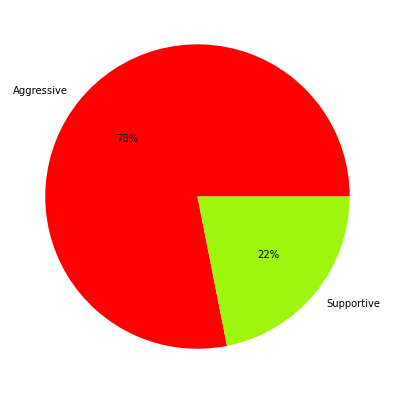

In [24]:
# LOL - 1800000 MAÇTA SEÇİLEN KARAKTERLERİN AGRO / SUP OLDUĞUNUN PİECHARTI
labels="Aggressive", "Supportive"
colors=["red","#9EF50E"]
class1=participants[participants["GameStyle"]=="Aggressive"].count()[1]
class2=participants[participants["GameStyle"]=="Supportive"].count()[1]
print(class1)
print(class2)
my_data=[class1,class2]
plt.pie(my_data,labels=labels,autopct='%2.f%%',colors=colors)
plt.show()

310108
189855


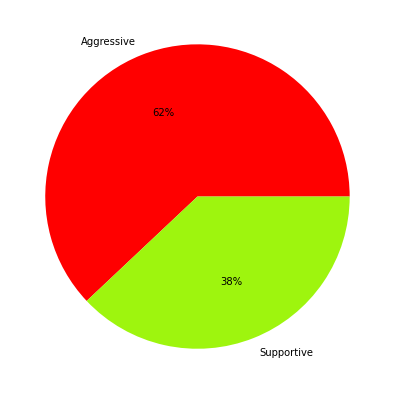

In [25]:
# DOTA - 500000 MAÇTA SEÇİLEN KARAKTERLERİN AGRO / SUP OLDUĞUNUN PİECHARTI
labels="Aggressive", "Supportive"
colors=["red","#9EF50E"]
class1=dotaplayers[dotaplayers["GameStyle"]=="Aggressive"].count()[1]
class2=dotaplayers[dotaplayers["GameStyle"]=="Supportive"].count()[1]
print(class1)
print(class2)
my_data=[class1,class2]
plt.pie(my_data,labels=labels,autopct='%2.f%%',colors=colors)
plt.show()

In [26]:
# LOL - BANLANAN DATALARI VE NULL VAR MI KONTROLÜ
print(teambans.count())
print(teambans.isnull().count())
teambans.head()

matchid       1099185
teamid        1099185
championid    1099185
banturn       1099185
dtype: int64
matchid       1099185
teamid        1099185
championid    1099185
banturn       1099185
dtype: int64


,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [27]:
# LOL - BANLANANLAR TABLOSUYLA CHAMPS İ BİRLEŞTİRİYORUZ
teambans= pd.merge(teambans,champs,how="left",left_on="championid",right_on="id")
print(teambans.isnull().count())
teambans.head()

matchid       1099185
teamid        1099185
championid    1099185
banturn       1099185
name          1099185
id            1099185
Name          1099185
Class         1099185
GameStyle     1099185
dtype: int64


,matchid,teamid,championid,banturn,name,id,Name,Class,GameStyle
0,10,100,11,1,Master Yi,11,Master Yi,Assasin,Aggressive
1,10,100,117,3,Lulu,117,Lulu,Support,Supportive
2,10,100,120,5,Hecarim,120,Hecarim,Warrior,Aggressive
3,10,200,84,2,Akali,84,Akali,Assasin,Aggressive
4,10,200,201,4,Braum,201,Braum,Support,Supportive


898795
200390


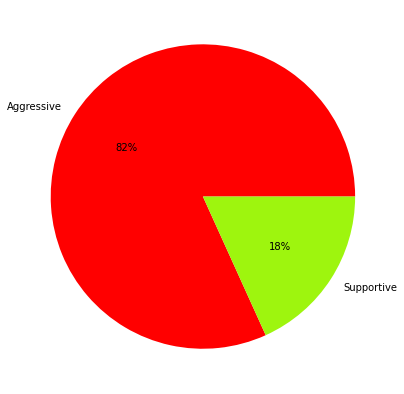

In [28]:
# LOL - 1000000 MAÇTA banlanan KARAKTERLERİN AGRO / SUP OLDUĞUNUN PİECHARTI
labels="Aggressive", "Supportive"
colors=["red","#9EF50E"]
class1=teambans[teambans["GameStyle"]=="Aggressive"].count()[1]
class2=teambans[teambans["GameStyle"]=="Supportive"].count()[1]
print(class1)
print(class2)
my_data=[class1,class2]
plt.pie(my_data,labels=labels,autopct='%2.f%%',colors=colors)
plt.show()

In [29]:
# LOL - İSME GÖRE EN ÇOK BANLANAN KARAKTERLER
print(teambans.Name.count())
print(teambans.Name.value_counts())

1099185
Yasuo      97862
Fizz       81525
Xayah      77293
Lulu       75421
Darius     58799
           ...  
Sion         221
Nami         161
Corki        156
Karthus      122
Sivir         78
Name: Name, Length: 136, dtype: int64


In [30]:
# LOL - İSME GÖRE EN ÇOK SEÇİLEN 10 KARAKTER
participants.Name.value_counts().head(10)

Lee Sin    59286
Caitlyn    57275
Lucian     56676
Thresh     48877
Ahri       37424
Vayne      35014
Yasuo      30257
Xayah      28944
Orianna    28594
Ezreal     28397
Name: Name, dtype: int64

In [31]:
# DOTA - İSME GÖRE EN ÇOK SEÇİLEN 10 KARAKTER
dotaplayers.localized_name.value_counts().head(10)

Windranger       20881
Shadow Fiend     17007
Invoker          11676
Earthshaker      11323
Slardar          11181
Queen of Pain    10590
Juggernaut       10394
Tusk             10306
Alchemist         9823
Pudge             9447
Name: localized_name, dtype: int64

In [32]:
# LOL - İSME GÖRE EN ÇOK SEÇİLEN 10 KARAKTERİ AYRI ARRAYLERE ATMACA
choosetop=[]
labelchoosetop=[]
print(participants.Name.value_counts().head(10).sum())
for iter in range(10):
    labelchoosetop.append(participants.Name.value_counts().head(10).index[iter])
    choosetop.append(participants.Name.value_counts().head(10)[iter])
print(labelchoosetop)
print(choosetop)

410744
['Lee Sin', 'Caitlyn', 'Lucian', 'Thresh', 'Ahri', 'Vayne', 'Yasuo', 'Xayah', 'Orianna', 'Ezreal']
[59286, 57275, 56676, 48877, 37424, 35014, 30257, 28944, 28594, 28397]


In [33]:
# DOTA - İSME GÖRE EN ÇOK SEÇİLEN 10 KARAKTERİ AYRI ARRAYLERE ATMACA
choosetop2=[]
labelchoosetop2=[]
print(dotaplayers.localized_name.value_counts().head(10).sum())
for iter in range(10):
    labelchoosetop2.append(dotaplayers.localized_name.value_counts().head(10).index[iter])
    choosetop2.append(dotaplayers.localized_name.value_counts().head(10)[iter])
print(labelchoosetop2)
print(choosetop2)

122628
['Windranger', 'Shadow Fiend', 'Invoker', 'Earthshaker', 'Slardar', 'Queen of Pain', 'Juggernaut', 'Tusk', 'Alchemist', 'Pudge']
[20881, 17007, 11676, 11323, 11181, 10590, 10394, 10306, 9823, 9447]


In [34]:
# LOL - İSME GÖRE EN ÇOK BANLANAN 10 KARAKTERİ AYRI ARRAYLERE ATMACA
bantop=[]
labelbantop=[]
print(teambans.Name.value_counts().head(10))
for iter in range(10):
    labelbantop.append(teambans.Name.value_counts().head(10).index[iter])
    bantop.append(teambans.Name.value_counts().head(10)[iter])
print(labelbantop)
print(bantop)

Yasuo       97862
Fizz        81525
Xayah       77293
Lulu        75421
Darius      58799
Sejuani     47063
Zed         41395
Katarina    39800
Fiora       36246
Ivern       30356
Name: Name, dtype: int64
['Yasuo', 'Fizz', 'Xayah', 'Lulu', 'Darius', 'Sejuani', 'Zed', 'Katarina', 'Fiora', 'Ivern']
[97862, 81525, 77293, 75421, 58799, 47063, 41395, 39800, 36246, 30356]


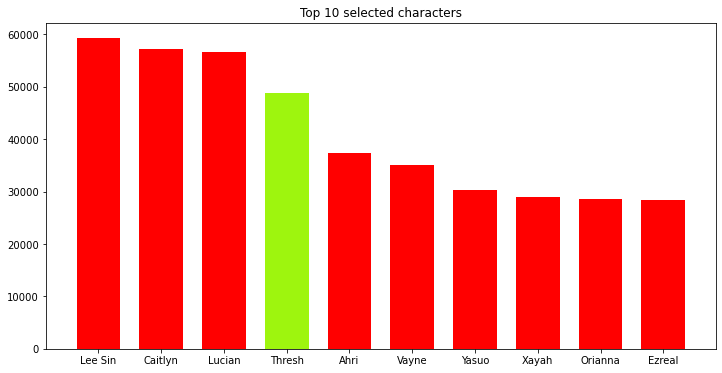

In [35]:
# LOL - TOP 10 SEÇİLENLER BARCHART
plt.figure(figsize=(12, 6))
plt.title('Top 10 selected characters')
plt.bar(labelchoosetop, choosetop, width=0.7,
color=['red', 'red', 'red', '#9EF50E', 'red', 'red', 'red', 'red', 'red', 'red'])
plt.show()

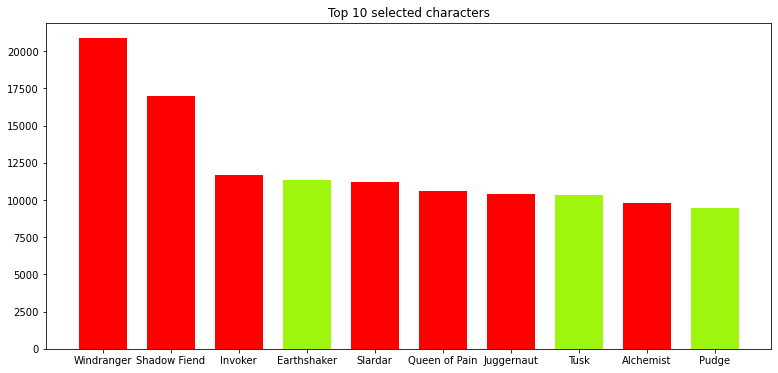

In [36]:
# DOTA - TOP 10 SEÇİLENLER BARCHART
plt.figure(figsize=(13, 6))
plt.title('Top 10 selected characters')
plt.bar(labelchoosetop2, choosetop2, width=0.7,
color=['red', 'red', 'red', '#9EF50E', 'red', 'red', 'red', '#9EF50E', 'red', '#9EF50E'])
plt.show()

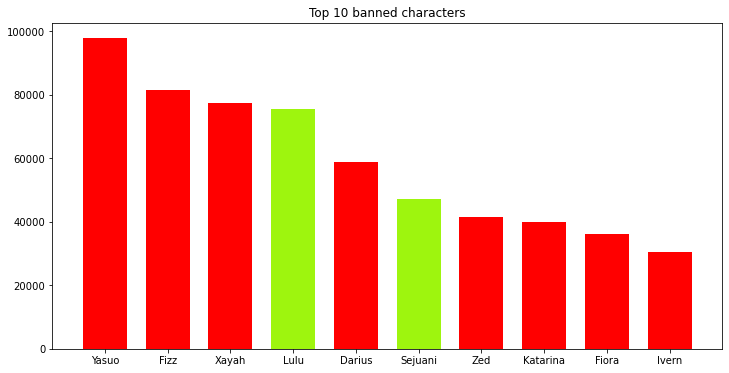

In [37]:
# LOL - TOP 10 BANLANANLAR BARCHART
plt.figure(figsize = (12,6))
plt.title('Top 10 banned characters')
plt.bar(labelbantop,bantop,width=0.7,color=['red', 'red', 'red', '#9EF50E', 'red', '#9EF50E', 'red', 'red', 'red', 'red'])
plt.show()

In [38]:
# LOL - KMEANS için df_stats belirleme
df_stats=stats[["id","kills","deaths","assists"]]

x = df_stats.iloc[:, [1, 2]].values
# wcss = []

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(range(1, 11), wcss)
# plt.title('The elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

0.küme -> 75934
1.küme -> 38374
2.küme -> 125391
3.küme -> 94237
4.küme -> 67994
5.küme -> 42669
6.küme -> 75276
7.küme -> 46142
8.küme -> 21001
9.küme -> 76376
10.küme -> 131127
11.küme -> 109254
12.küme -> 96224


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


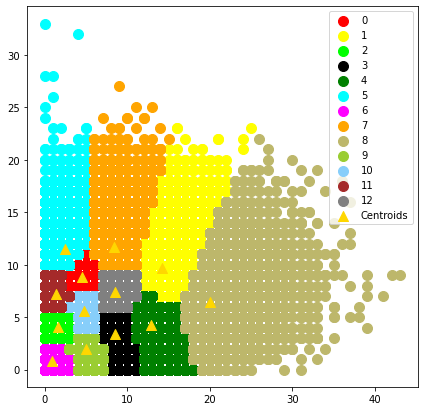

In [39]:
kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'lime', label = '2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'black', label = '3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'green', label = '4')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'aqua', label = '5')
plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], s = 100, c = 'fuchsia', label = '6')
plt.scatter(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1], s = 100, c = 'orange', label = '7')
plt.scatter(x[y_kmeans == 8, 0], x[y_kmeans == 8, 1], s = 100, c = 'darkkhaki', label = '8')
plt.scatter(x[y_kmeans == 9, 0], x[y_kmeans == 9, 1], s = 100, c = 'yellowgreen', label = '9')
plt.scatter(x[y_kmeans == 10, 0], x[y_kmeans == 10, 1], s = 100, c = 'lightskyblue', label = '10')
plt.scatter(x[y_kmeans == 11, 0], x[y_kmeans == 11, 1], s = 100, c = 'brown', label = '11')
plt.scatter(x[y_kmeans == 12, 0], x[y_kmeans == 12, 1], s = 100, c = 'gray', label = '12')

# dağılımdaki kümelerdeki eleman sayıları, buradan agresif/supportive/iyi kötü/bencil olup olmadığı gibi sonuçlar çıkacak.
print("0.küme -> " + str(len(x[y_kmeans == 0, 0])))
print("1.küme -> " + str(len(x[y_kmeans == 1, 0])))
print("2.küme -> " + str(len(x[y_kmeans == 2, 0])))
print("3.küme -> " + str(len(x[y_kmeans == 3, 0])))
print("4.küme -> " + str(len(x[y_kmeans == 4, 0])))
print("5.küme -> " + str(len(x[y_kmeans == 5, 0])))
print("6.küme -> " + str(len(x[y_kmeans == 6, 0])))
print("7.küme -> " + str(len(x[y_kmeans == 7, 0])))
print("8.küme -> " + str(len(x[y_kmeans == 8, 0])))
print("9.küme -> " + str(len(x[y_kmeans == 9, 0])))
print("10.küme -> " + str(len(x[y_kmeans == 10, 0])))
print("11.küme -> " + str(len(x[y_kmeans == 11, 0])))
print("12.küme -> " + str(len(x[y_kmeans == 12, 0])))

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'gold', marker='^', label = 'Centroids')

plt.legend()

C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


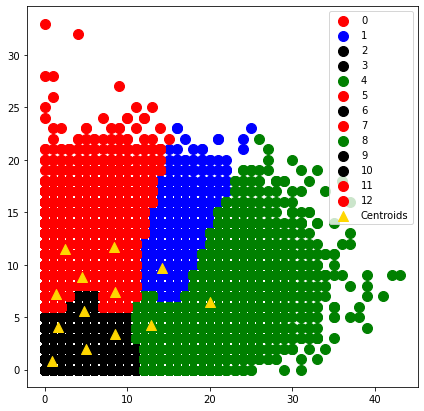

In [40]:
kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'black', label = '2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'black', label = '3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'green', label = '4')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'red', label = '5')
plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], s = 100, c = 'black', label = '6')
plt.scatter(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1], s = 100, c = 'red', label = '7')
plt.scatter(x[y_kmeans == 8, 0], x[y_kmeans == 8, 1], s = 100, c = 'green', label = '8')
plt.scatter(x[y_kmeans == 9, 0], x[y_kmeans == 9, 1], s = 100, c = 'black', label = '9')
plt.scatter(x[y_kmeans == 10, 0], x[y_kmeans == 10, 1], s = 100, c = 'black', label = '10')
plt.scatter(x[y_kmeans == 11, 0], x[y_kmeans == 11, 1], s = 100, c = 'red', label = '11')
plt.scatter(x[y_kmeans == 12, 0], x[y_kmeans == 12, 1], s = 100, c = 'red', label = '12')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'gold', marker='^', label = 'Centroids')

plt.legend()

C:\anaconda\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\anaconda\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


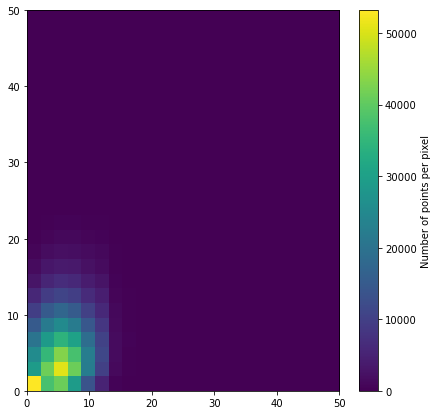

In [41]:
x = df_stats["deaths"]
y = df_stats["kills"]
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(x, y,dpi=6)
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
fig.colorbar(density, label='Number of points per pixel')

In [42]:
# DOTA - KMEANS için df_stats belirleme
df_dotaplayers=dotaplayers[["kills","deaths"]]

x = df_dotaplayers.values

0.küme -> 52519
1.küme -> 26371
2.küme -> 35047
3.küme -> 61742
4.küme -> 11739
5.küme -> 26680
6.küme -> 39557
0.küme -> 27737
1.küme -> 62855
2.küme -> 38422
3.küme -> 59428
4.küme -> 39380
5.küme -> 18523


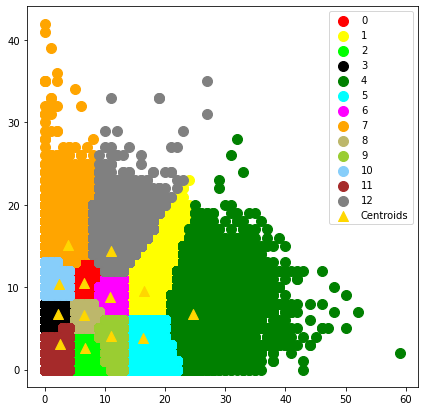

In [43]:
dota_kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_dotakmeans = dota_kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_dotakmeans == 0, 0], x[y_dotakmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x[y_dotakmeans == 1, 0], x[y_dotakmeans == 1, 1], s = 100, c = 'yellow', label = '1')
plt.scatter(x[y_dotakmeans == 2, 0], x[y_dotakmeans == 2, 1], s = 100, c = 'lime', label = '2')
plt.scatter(x[y_dotakmeans == 3, 0], x[y_dotakmeans == 3, 1], s = 100, c = 'black', label = '3')
plt.scatter(x[y_dotakmeans == 4, 0], x[y_dotakmeans == 4, 1], s = 100, c = 'green', label = '4')
plt.scatter(x[y_dotakmeans == 5, 0], x[y_dotakmeans == 5, 1], s = 100, c = 'aqua', label = '5')
plt.scatter(x[y_dotakmeans == 6, 0], x[y_dotakmeans == 6, 1], s = 100, c = 'fuchsia', label = '6')
plt.scatter(x[y_dotakmeans == 7, 0], x[y_dotakmeans == 7, 1], s = 100, c = 'orange', label = '7')
plt.scatter(x[y_dotakmeans == 8, 0], x[y_dotakmeans == 8, 1], s = 100, c = 'darkkhaki', label = '8')
plt.scatter(x[y_dotakmeans == 9, 0], x[y_dotakmeans == 9, 1], s = 100, c = 'yellowgreen', label = '9')
plt.scatter(x[y_dotakmeans == 10, 0], x[y_dotakmeans == 10, 1], s = 100, c = 'lightskyblue', label = '10')
plt.scatter(x[y_dotakmeans == 11, 0], x[y_dotakmeans == 11, 1], s = 100, c = 'brown', label = '11')
plt.scatter(x[y_dotakmeans == 12, 0], x[y_dotakmeans == 12, 1], s = 100, c = 'gray', label = '12')

# dağılımdaki kümelerdeki eleman sayıları, buradan agresif/supportive/iyi kötü/bencil olup olmadığı gibi sonuçlar çıkacak.
print("0.küme -> " + str(len(x[y_dotakmeans == 0, 0])))
print("1.küme -> " + str(len(x[y_dotakmeans == 1, 0])))
print("2.küme -> " + str(len(x[y_dotakmeans == 2, 0])))
print("3.küme -> " + str(len(x[y_dotakmeans == 3, 0])))
print("4.küme -> " + str(len(x[y_dotakmeans == 4, 0])))
print("5.küme -> " + str(len(x[y_dotakmeans == 5, 0])))
print("6.küme -> " + str(len(x[y_dotakmeans == 6, 0])))
print("0.küme -> " + str(len(x[y_dotakmeans == 7, 0])))
print("1.küme -> " + str(len(x[y_dotakmeans == 8, 0])))
print("2.küme -> " + str(len(x[y_dotakmeans == 9, 0])))
print("3.küme -> " + str(len(x[y_dotakmeans == 10, 0])))
print("4.küme -> " + str(len(x[y_dotakmeans == 11, 0])))
print("5.küme -> " + str(len(x[y_dotakmeans == 12, 0])))

#Plotting the centroids of the clusters
plt.scatter(dota_kmeans.cluster_centers_[:, 0], dota_kmeans.cluster_centers_[:,1], s = 100, c = 'gold', marker='^', label = 'Centroids')

plt.legend()

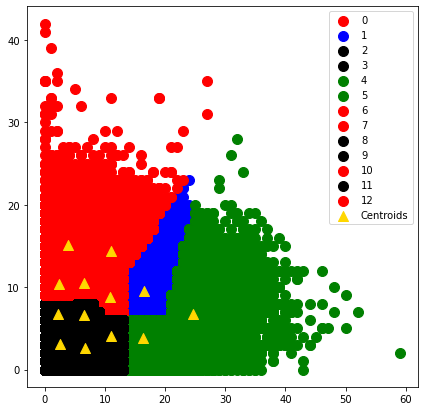

In [44]:
dota_kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_dotakmeans = dota_kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_dotakmeans == 0, 0], x[y_dotakmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x[y_dotakmeans == 1, 0], x[y_dotakmeans == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(x[y_dotakmeans == 2, 0], x[y_dotakmeans == 2, 1], s = 100, c = 'black', label = '2')
plt.scatter(x[y_dotakmeans == 3, 0], x[y_dotakmeans == 3, 1], s = 100, c = 'black', label = '3')
plt.scatter(x[y_dotakmeans == 4, 0], x[y_dotakmeans == 4, 1], s = 100, c = 'green', label = '4')
plt.scatter(x[y_dotakmeans == 5, 0], x[y_dotakmeans == 5, 1], s = 100, c = 'green', label = '5')
plt.scatter(x[y_dotakmeans == 6, 0], x[y_dotakmeans == 6, 1], s = 100, c = 'red', label = '6')
plt.scatter(x[y_dotakmeans == 7, 0], x[y_dotakmeans == 7, 1], s = 100, c = 'red', label = '7')
plt.scatter(x[y_dotakmeans == 8, 0], x[y_dotakmeans == 8, 1], s = 100, c = 'black', label = '8')
plt.scatter(x[y_dotakmeans == 9, 0], x[y_dotakmeans == 9, 1], s = 100, c = 'black', label = '9')
plt.scatter(x[y_dotakmeans == 10, 0], x[y_dotakmeans == 10, 1], s = 100, c = 'red', label = '10')
plt.scatter(x[y_dotakmeans == 11, 0], x[y_dotakmeans == 11, 1], s = 100, c = 'black', label = '11')
plt.scatter(x[y_dotakmeans == 12, 0], x[y_dotakmeans == 12, 1], s = 100, c = 'red', label = '12')
#Plotting the centroids of the clusters
plt.scatter(dota_kmeans.cluster_centers_[:, 0], dota_kmeans.cluster_centers_[:,1], s = 100, c = 'gold', marker='^', label = 'Centroids')

plt.legend()

C:\anaconda\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\anaconda\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


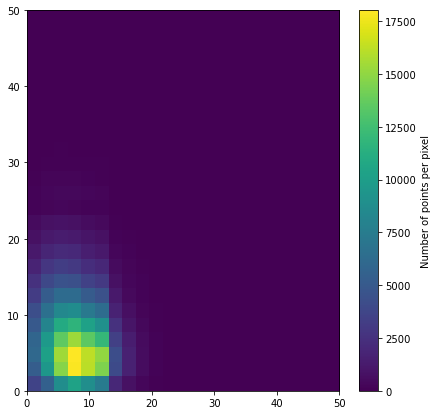

In [45]:
x = df_dotaplayers["deaths"]
y = df_dotaplayers["kills"]
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(x, y,dpi=6)
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
fig.colorbar(density, label='Number of points per pixel')

In [46]:
participants.head(10)

,id_x,matchid,player,championid,ss1,ss2,role,position,name,id_y,Name,Class,GameStyle
0,9,10,1,19,4,11,NONE,JUNGLE,Warwick,19,Warwick,Warrior,Aggressive
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,Nami,267,Nami,Support,Supportive
2,11,10,3,119,7,4,DUO_CARRY,BOT,Draven,119,Draven,Marksman,Aggressive
3,12,10,4,114,12,4,SOLO,TOP,Fiora,114,Fiora,Warrior,Aggressive
4,13,10,5,112,4,3,SOLO,MID,Viktor,112,Viktor,Mage,Aggressive
5,14,10,6,72,11,4,NONE,JUNGLE,Skarner,72,Skarner,Warrior,Aggressive
6,15,10,7,3,4,12,SOLO,TOP,Galio,3,Galio,Mage,Aggressive
7,16,10,8,103,14,4,SOLO,MID,Ahri,103,Ahri,Mage,Aggressive
8,17,10,9,222,7,4,DUO_CARRY,BOT,Jinx,222,Jinx,Marksman,Aggressive
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,161,VelKoz,Mage,Aggressive


In [47]:
stats_tree=stats[["id","kills","deaths","assists"]]
stats_tree.head(10)

,id,kills,deaths,assists
0,9,6,10,1
1,10,0,2,12
2,11,7,8,5
3,12,5,11,2
4,13,2,8,2
5,14,3,3,9
6,15,4,5,11
7,16,13,4,8
8,17,15,3,9
9,18,4,5,19


In [48]:
participants_tree= pd.merge(participants,stats_tree,how="inner",left_on="id_x",right_on="id")
print(participants_tree.isnull().count())
participants_tree.head(10)

id_x          999999
matchid       999999
player        999999
championid    999999
ss1           999999
ss2           999999
role          999999
position      999999
name          999999
id_y          999999
Name          999999
Class         999999
GameStyle     999999
id            999999
kills         999999
deaths        999999
assists       999999
dtype: int64


,id_x,matchid,player,championid,ss1,ss2,role,position,name,id_y,Name,Class,GameStyle,id,kills,deaths,assists
0,9,10,1,19,4,11,NONE,JUNGLE,Warwick,19,Warwick,Warrior,Aggressive,9,6,10,1
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,Nami,267,Nami,Support,Supportive,10,0,2,12
2,11,10,3,119,7,4,DUO_CARRY,BOT,Draven,119,Draven,Marksman,Aggressive,11,7,8,5
3,12,10,4,114,12,4,SOLO,TOP,Fiora,114,Fiora,Warrior,Aggressive,12,5,11,2
4,13,10,5,112,4,3,SOLO,MID,Viktor,112,Viktor,Mage,Aggressive,13,2,8,2
5,14,10,6,72,11,4,NONE,JUNGLE,Skarner,72,Skarner,Warrior,Aggressive,14,3,3,9
6,15,10,7,3,4,12,SOLO,TOP,Galio,3,Galio,Mage,Aggressive,15,4,5,11
7,16,10,8,103,14,4,SOLO,MID,Ahri,103,Ahri,Mage,Aggressive,16,13,4,8
8,17,10,9,222,7,4,DUO_CARRY,BOT,Jinx,222,Jinx,Marksman,Aggressive,17,15,3,9
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,161,VelKoz,Mage,Aggressive,18,4,5,19


In [49]:
participants_tree=participants_tree[["championid","kills","deaths","assists"]]
participants_tree.head(10)

,championid,kills,deaths,assists
0,19,6,10,1
1,267,0,2,12
2,119,7,8,5
3,114,5,11,2
4,112,2,8,2
5,72,3,3,9
6,3,4,5,11
7,103,13,4,8
8,222,15,3,9
9,161,4,5,19


In [50]:
participants_means=participants_tree.groupby(by=["championid"]).mean()
participants_means.head(10)

,kills,deaths,assists
championid,,,
1,6.839387,6.426132,7.569396
2,6.222863,5.883766,6.596542
3,3.833447,5.452267,9.893368
4,6.150146,6.303213,7.651607
5,6.701913,6.601474,6.321355
6,5.380952,5.827839,5.864469
7,7.772672,5.684595,5.970061
8,6.028019,5.940366,6.181450
9,5.250755,6.192749,9.452870


In [51]:
champs.head(5)

,name,id,Name,Class,GameStyle
0,Jax,24,Jax,Warrior,Aggressive
1,Sona,37,Sona,Support,Supportive
2,Tristana,18,Tristana,Marksman,Aggressive
3,Varus,110,Varus,Marksman,Aggressive
4,Fiora,114,Fiora,Warrior,Aggressive


In [52]:
participants_tree2= pd.merge(participants_means,champs,how="left",left_on="championid",right_on="id")
participants_tree2.head(50).sort_values(by=["assists"], ascending=False)

,kills,deaths,assists,name,id,Name,Class,GameStyle
43,1.468571,4.839481,14.046753,Taric,44,Taric,Support,Supportive
39,0.850101,3.935479,13.996774,Janna,40,Janna,Support,Supportive
15,0.903585,4.976635,13.896603,Soraka,16,Soraka,Support,Supportive
36,2.854832,5.483219,13.318507,Sona,37,Sona,Support,Supportive
11,1.914720,5.486558,12.937197,Alistar,12,Alistar,Support,Supportive
24,3.200398,5.570575,12.861339,Morgana,25,Morgana,Support,Supportive
48,2.417912,5.514940,12.584711,Blitzcrank,53,Blitzcrank,Support,Supportive
42,2.440296,5.117718,12.150264,Karma,43,Karma,Support,Supportive
25,3.121084,4.581325,11.458735,Zilean,26,Zilean,Support,Supportive
31,4.544060,5.290407,10.560556,Amumu,32,Amumu,Tank,Supportive


In [53]:
participants_tree3=participants_tree2[["kills","deaths","assists","GameStyle"]]
X = participants_tree3.drop(["GameStyle"], axis = 1)
Y= participants_tree3["GameStyle"]

In [54]:
print(X)

        kills    deaths    assists
0    6.839387  6.426132   7.569396
1    6.222863  5.883766   6.596542
2    3.833447  5.452267   9.893368
3    6.150146  6.303213   7.651607
4    6.701913  6.601474   6.321355
..        ...       ...        ...
131  2.589975  4.031224  13.018694
132  7.632767  6.345500   6.541098
133  3.261449  5.719268  13.168297
134  1.431607  5.407344  13.834880
135  6.894287  5.920240   7.013897

[136 rows x 3 columns]


In [55]:
print(Y)

0      Aggressive
1      Aggressive
2      Aggressive
3      Aggressive
4      Aggressive
          ...    
131    Aggressive
132    Aggressive
133    Supportive
134    Supportive
135    Aggressive
Name: GameStyle, Length: 136, dtype: object


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Y_pred

array(['Aggressive', 'Aggressive', 'Aggressive', 'Aggressive',
       'Aggressive', 'Aggressive', 'Aggressive', 'Supportive',
       'Aggressive', 'Aggressive', 'Supportive', 'Aggressive',
       'Aggressive', 'Supportive', 'Supportive', 'Aggressive',
       'Aggressive', 'Aggressive', 'Aggressive', 'Aggressive',
       'Supportive', 'Aggressive', 'Aggressive', 'Aggressive',
       'Supportive', 'Supportive', 'Aggressive', 'Aggressive',
       'Supportive', 'Aggressive', 'Supportive', 'Aggressive',
       'Supportive', 'Aggressive', 'Aggressive', 'Aggressive',
       'Aggressive', 'Aggressive', 'Aggressive', 'Supportive',
       'Aggressive'], dtype=object)

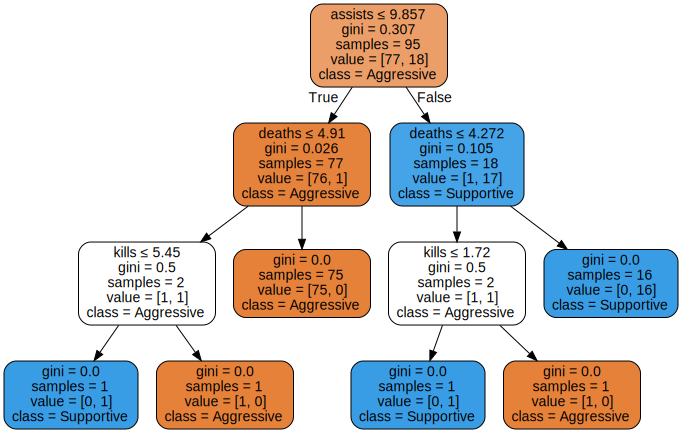

In [57]:
# LOL - Visualizing decision trees using Graphviz
fn=['kills', 'deaths', 'assists']
cn=['Aggressive', 'Supportive']
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = fn, class_names = cn, filled = True, 
                                rounded = True, special_characters = True)
graphviz.Source(dot_data)

In [58]:
#Confusion matrix
cf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(cf_matrix)

[[30  3]
 [ 0  8]]


In [59]:
#Accuracy, precision, recall, and f-1 score
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

  Aggressive       1.00      0.91      0.95        33
  Supportive       0.73      1.00      0.84         8

    accuracy                           0.93        41
   macro avg       0.86      0.95      0.90        41
weighted avg       0.95      0.93      0.93        41



In [60]:
dotaplayers.head(10)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue,id,localized_name,roles,GameStyle
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,NaN,NaN,NaN,86.0,Rubick,"['Support', 'Disabler', 'Nuker']",Supportive
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,Clockwerk,"['Initiator', 'Disabler', 'Durable', 'Nuker']",Supportive
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,83.0,Treant Protector,"['Support', 'Initiator', 'Durable', 'Disabler'...",Supportive
3,0,2,11,3,1179,22505,599,605,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Shadow Fiend,"['Carry', 'Nuker']",Aggressive
4,0,3,67,4,3307,23825,613,762,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,67.0,Spectre,"['Carry', 'Durable', 'Escape']",Aggressive
5,0,4,106,128,476,12285,397,524,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,106.0,Ember Spirit,"['Carry', 'Escape', 'Nuker', 'Disabler', 'Init...",Aggressive
6,0,0,102,129,317,10355,303,369,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,102.0,Abaddon,"['Support', 'Carry', 'Durable']",Supportive
7,0,5,46,130,2390,13395,452,517,4,8,...,110.0,NaN,NaN,NaN,NaN,NaN,46.0,Templar Assassin,"['Carry', 'Escape']",Aggressive
8,0,0,7,131,475,5035,189,223,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Earthshaker,"['Support', 'Initiator', 'Disabler', 'Nuker']",Supportive
9,0,6,73,132,60,17550,496,456,1,11,...,NaN,NaN,NaN,NaN,NaN,NaN,73.0,Alchemist,"['Carry', 'Support', 'Durable', 'Disabler', 'I...",Aggressive


In [61]:
dotaplayers_tree=dotaplayers[["hero_id","kills","deaths","assists"]]
dotaplayers_tree.head(10)

,hero_id,kills,deaths,assists
0,86,9,3,18
1,51,13,3,18
2,83,0,4,15
3,11,8,4,19
4,67,20,3,17
5,106,5,6,8
6,102,4,13,5
7,46,4,8,6
8,7,1,14,8
9,73,1,11,6


In [62]:
dotaplayers_means=dotaplayers_tree.groupby(by=["hero_id"]).mean()
dotaplayers_means.head(10)

,kills,deaths,assists
hero_id,,,
0,0.000000,0.000000,0.000000
1,7.340996,5.449979,6.722222
2,8.525321,9.365138,10.498153
3,4.766941,7.721112,11.811986
4,9.657307,9.190122,9.746279
5,4.483686,8.946215,14.027402
6,6.869248,7.980061,7.801380
7,4.931202,8.514616,15.178221
8,9.552627,6.439099,8.394939


In [63]:
dotaplayers_tree2 = pd.merge(dotaplayers_means,newdotachamps,how="left",left_on="hero_id",right_on="id")
dotaplayers_tree2.head(50).sort_values(by=["assists"], ascending=False)

,kills,deaths,assists,id,localized_name,roles,GameStyle
22,10.025278,7.576814,18.238178,22.0,Zeus,['Nuker'],Aggressive
39,5.363184,9.451078,17.505804,40.0,Venomancer,"['Support', 'Nuker', 'Initiator', 'Pusher', 'D...",Supportive
35,8.765622,7.995812,15.270565,36.0,Necrophos,"['Carry', 'Nuker', 'Durable', 'Disabler']",Aggressive
28,4.201667,7.491667,15.233333,29.0,Tidehunter,"['Initiator', 'Durable', 'Disabler', 'Nuker']",Supportive
7,4.931202,8.514616,15.178221,7.0,Earthshaker,"['Support', 'Initiator', 'Disabler', 'Nuker']",Supportive
32,4.416440,7.364095,15.151221,33.0,Enigma,"['Disabler', 'Jungler', 'Initiator', 'Pusher']",Supportive
16,5.474286,8.010794,14.446667,16.0,Sand King,"['Initiator', 'Disabler', 'Support', 'Nuker', ...",Supportive
13,8.373651,8.253265,14.290176,13.0,Puck,"['Initiator', 'Disabler', 'Escape', 'Nuker']",Supportive
20,4.087744,8.633286,14.141869,20.0,Vengeful Spirit,"['Support', 'Initiator', 'Disabler', 'Nuker', ...",Supportive
5,4.483686,8.946215,14.027402,5.0,Crystal Maiden,"['Support', 'Disabler', 'Nuker', 'Jungler']",Supportive


In [64]:
dotaplayers_tree3=dotaplayers_tree2[["kills","deaths","assists","GameStyle"]]
x = dotaplayers_tree3.drop(["GameStyle"], axis = 1)
y = dotaplayers_tree3["GameStyle"]

In [65]:
print(x)

        kills    deaths    assists
0    0.000000  0.000000   0.000000
1    7.340996  5.449979   6.722222
2    8.525321  9.365138  10.498153
3    4.766941  7.721112  11.811986
4    9.657307  9.190122   9.746279
..        ...       ...        ...
106  5.356838  7.667023  15.289530
107  7.531915  7.255964   9.275306
108  6.465170  7.988775  15.667217
109  5.663033  7.887017   9.775025
110  3.637911  7.674678  12.228401

[111 rows x 3 columns]


In [66]:
print(y)

0             NaN
1      Aggressive
2      Supportive
3      Supportive
4      Aggressive
          ...    
106    Aggressive
107    Aggressive
108    Supportive
109    Supportive
110    Supportive
Name: GameStyle, Length: 111, dtype: object


In [67]:
X_traindota, X_testdota, Y_traindota, Y_testdota = train_test_split(x, y, test_size=0.30, random_state=2)

clf_dota = DecisionTreeClassifier(max_depth = 5, random_state = 0)
clf_dota.fit(X_traindota, Y_traindota)
Y_preddota = clf_dota.predict(X_testdota)
Y_preddota

array(['Supportive', 'Supportive', 'Aggressive', 'Aggressive',
       'Supportive', 'Aggressive', 'Supportive', 'Supportive',
       'Supportive', 'Aggressive', 'Aggressive', 'Supportive',
       'Aggressive', 'Aggressive', 'Supportive', 'Aggressive',
       'Aggressive', 'Supportive', 'Aggressive', 'Aggressive',
       'Supportive', 'Aggressive', 'Supportive', 'Supportive',
       'Aggressive', 'Supportive', 'Supportive', 'Aggressive',
       'Aggressive', 'Supportive', 'Supportive', 'Aggressive',
       'Supportive', 'Supportive'], dtype=object)

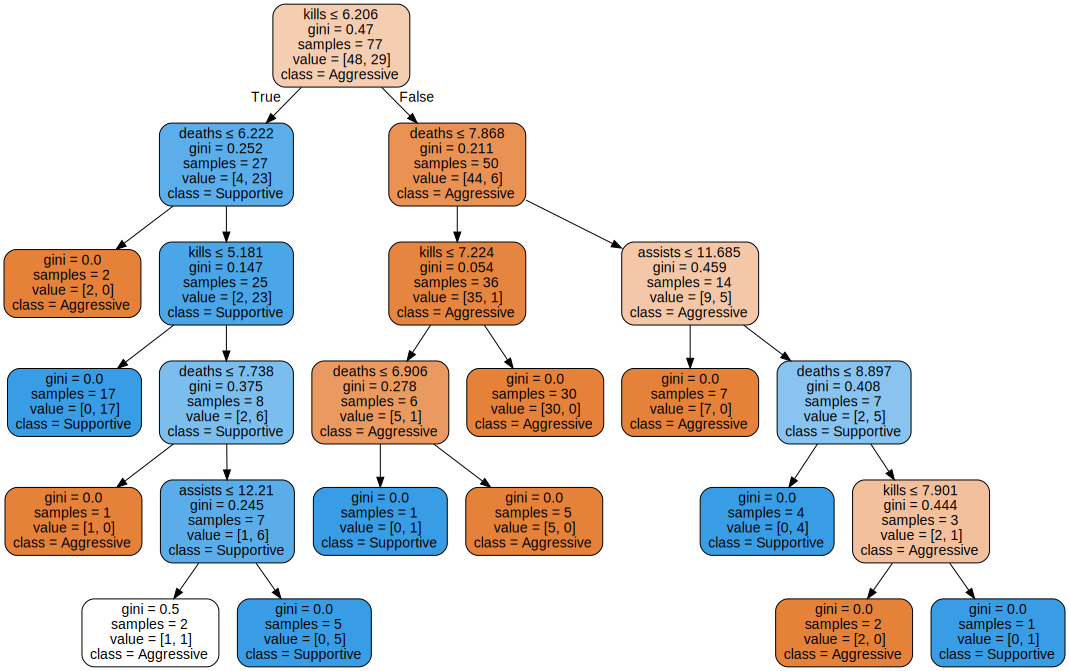

In [68]:
# DOTA - Visualizing decision trees using Graphviz
fn=['kills', 'deaths', 'assists']
cn=['Aggressive', 'Supportive']
dota_dot_data = tree.export_graphviz(clf_dota, out_file = None, feature_names = fn, class_names = cn, filled = True, 
                                rounded = True, special_characters = True)
graphviz.Source(dota_dot_data)